In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import statsmodels.api as sm

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


## Different types of anomaly

### Contexual Anomaly

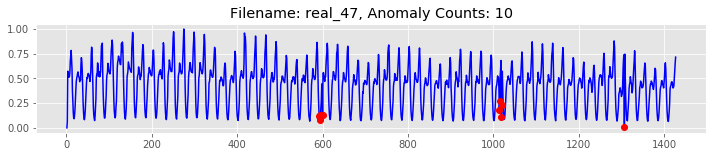

In [3]:
filename = "real_47"
data=pd.read_csv("./dataset/A1Benchmark/"+filename+".csv")
## performed min max normalization
data.value = (data.value-data.value.min())/(data.value.max()-data.value.min())
data_anomaly_positions = data.loc[data['is_anomaly'] == 1,  ('timestamp','value')]
fig = plt.figure(1, figsize=(12, 2))
plt.plot(data['timestamp'], data['value'], color="blue")
plt.title("Filename: " + filename + ", Anomaly Counts: " + str(data_anomaly_positions.shape[0]))
plt.plot(data_anomaly_positions['timestamp'], data_anomaly_positions['value'], 'ro', color="red")
plt.savefig('contextual_anomaly.png')

### Point Anomaly

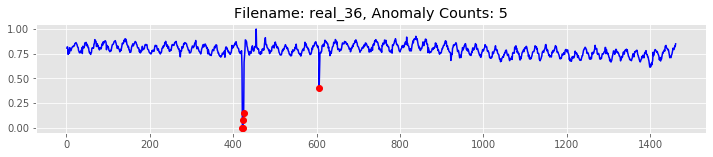

In [4]:
filename = "real_36"
data=pd.read_csv("./dataset/A1Benchmark/"+filename+".csv")
## performed min max normalization
data.value = (data.value-data.value.min())/(data.value.max()-data.value.min())
data_anomaly_positions = data.loc[data['is_anomaly'] == 1,  ('timestamp','value')]
fig = plt.figure(1, figsize=(12, 2))
plt.plot(data['timestamp'], data['value'], color="blue")
plt.title("Filename: " + filename + ", Anomaly Counts: " + str(data_anomaly_positions.shape[0]))
plt.plot(data_anomaly_positions['timestamp'], data_anomaly_positions['value'], 'ro', color="red")
plt.savefig('point_anomaly.png')

### Collective Anomaly

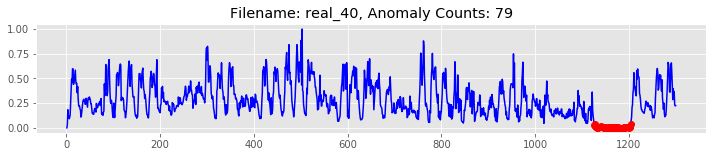

In [5]:
filename = "real_40"
data=pd.read_csv("./dataset/A1Benchmark/"+filename+".csv")[:1300]
## performed min max normalization
data.value = (data.value-data.value.min())/(data.value.max()-data.value.min())
data_anomaly_positions = data.loc[data['is_anomaly'] == 1,  ('timestamp','value')]
fig = plt.figure(1, figsize=(12, 2))
plt.plot(data['timestamp'], data['value'], color="blue")
plt.title("Filename: " + filename + ", Anomaly Counts: " + str(data_anomaly_positions.shape[0]))
plt.plot(data_anomaly_positions['timestamp'], data_anomaly_positions['value'], 'ro', color="red")
plt.savefig('collective_anomaly.png')

## Local&Global Anomaly

### local

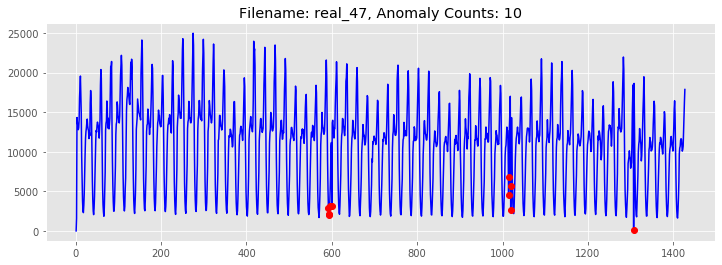

In [6]:
filename = "real_47"
data=pd.read_csv("./dataset/A1Benchmark/"+filename+".csv")
data_anomaly_positions = data.loc[data['is_anomaly'] == 1,  ('timestamp','value')]
fig = plt.figure(1, figsize=(12, 4))
plt.plot(data['timestamp'], data['value'], color="blue")
plt.title("Filename: " + filename + ", Anomaly Counts: " + str(data_anomaly_positions.shape[0]))
plt.plot(data_anomaly_positions['timestamp'], data_anomaly_positions['value'], 'ro', color="red")

### global

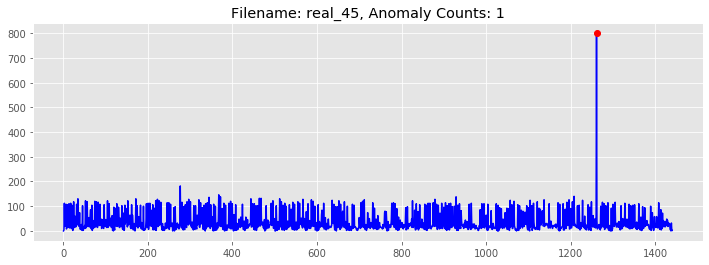

In [7]:
filename = "real_45"
data=pd.read_csv("./dataset/A1Benchmark/"+filename+".csv")
data_anomaly_positions = data.loc[data['is_anomaly'] == 1,  ('timestamp','value')]
fig = plt.figure(1, figsize=(12, 4))
plt.plot(data['timestamp'], data['value'], color="blue")
plt.title("Filename: " + filename + ", Anomaly Counts: " + str(data_anomaly_positions.shape[0]))
plt.plot(data_anomaly_positions['timestamp'], data_anomaly_positions['value'], 'ro', color="red")

## Num of Anomalies V.S Num of Outliers

In [9]:
from scipy import stats
file_attr = []
for i in range(1,67+1):
    filename = "real_"+str(i)
    data=pd.read_csv("./dataset/A1Benchmark/"+filename+".csv")
    #outlier detection
    z = np.abs(stats.zscore(data['value']))
    num_outliers = len(z[(z>3)|(z<-3)])
    
    num_anomaly = data.is_anomaly.sum()

    file_attr.append([num_anomaly, num_outliers])

In [10]:
file_df = pd.DataFrame(file_attr, columns=['num_anomaly' ,'num_outliers'])

In [11]:
file_df['file_number'] = range(1,68)

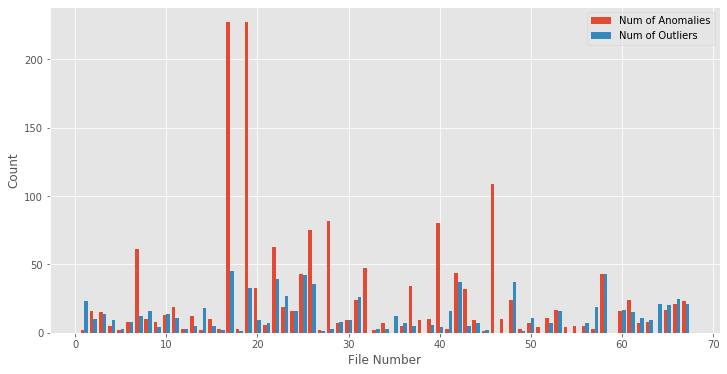

In [14]:
fig = plt.figure(figsize=(12, 6))
plt.bar(file_df.file_number - 0.2, file_df.num_anomaly, 0.4, label = 'Num of Anomalies')
plt.bar(file_df.file_number + 0.2, file_df.num_outliers, 0.4, label = 'Num of Outliers')
X_axis = np.arange(len(file_df))
X = file_df.file_number
plt.xlabel("File Number")
plt.ylabel("Count")
plt.legend()
plt.savefig('Outlier_Anomaly.png')

In [212]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr

corr_pearson, p_value_pearson = pearsonr(file_df['num_anomaly'], file_df['num_outliers'])
corr_spearman, p_value_spearman = spearmanr(file_df['num_anomaly'], file_df['num_outliers'])

In [215]:
corr_pearson

0.4618458282962137

#### linearly and positively correlated, but not notable as the pearson corr is below 0.5

In [216]:
corr_spearman

0.39585612130817643

#### Both num_anomalies and num_outliers distributions are non-Gaussian, Spearman corr might be of a better choice as it is ranking based. Thus, it assumes a monotonic relationship rather than a linear one. Still, the correlation is not notable.

In [213]:
p_value_pearson

8.351200818269184e-05

In [214]:
p_value_spearman

0.0009137796551263801

## Histogram of a file

file_num:  1


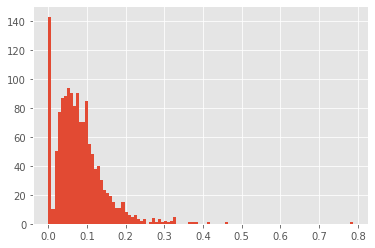

file_num:  2


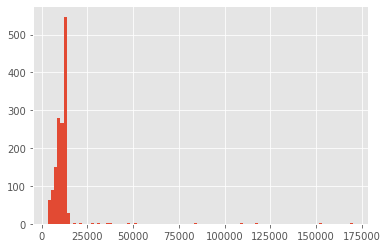

file_num:  3


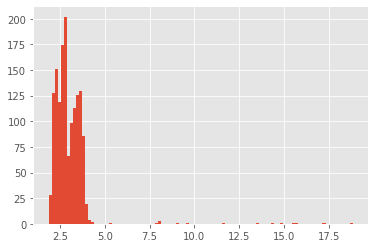

file_num:  4


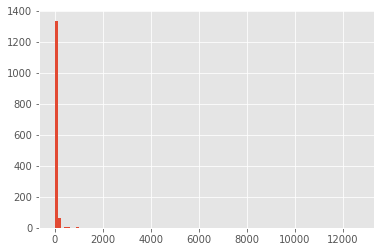

file_num:  5


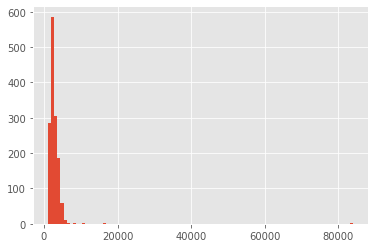

file_num:  6


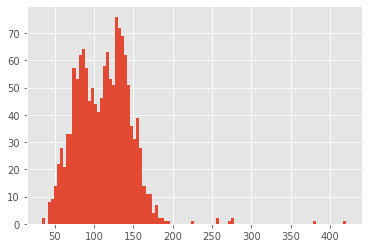

file_num:  7


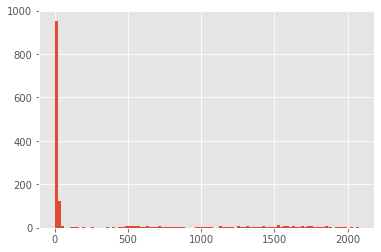

file_num:  8


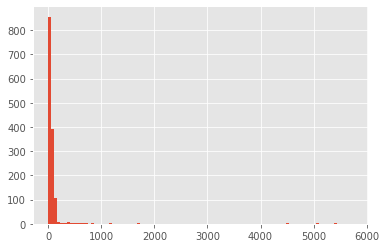

file_num:  9


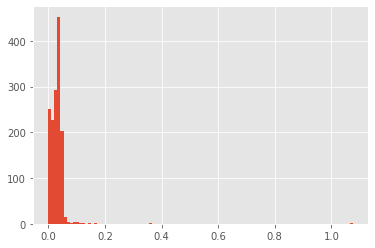

file_num:  10


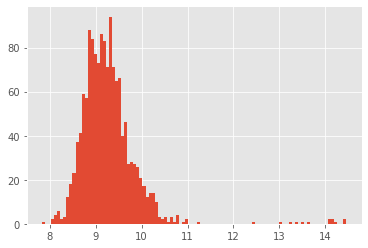

file_num:  11


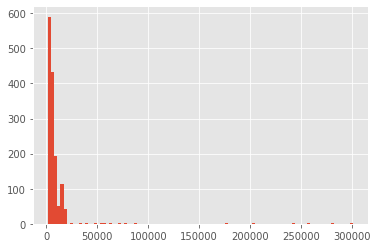

file_num:  12


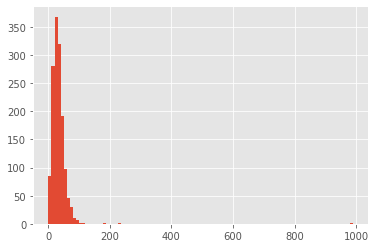

file_num:  13


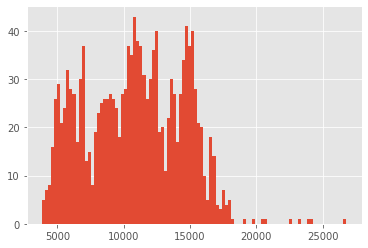

file_num:  14


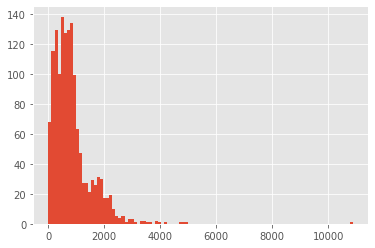

file_num:  15


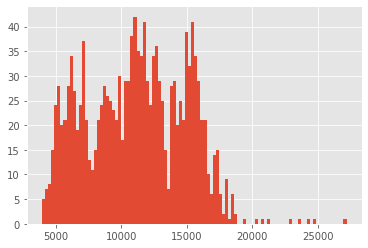

file_num:  16


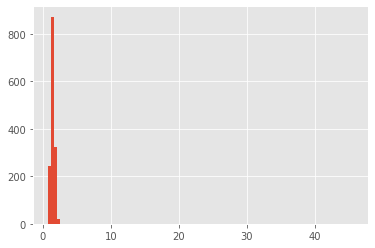

file_num:  17


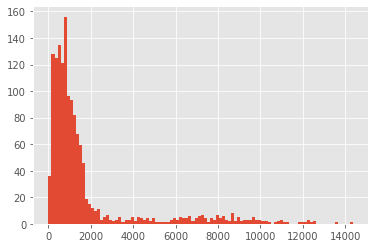

file_num:  18


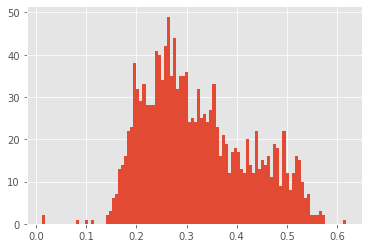

file_num:  19


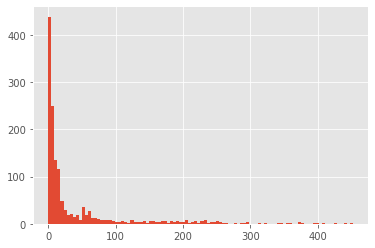

file_num:  20


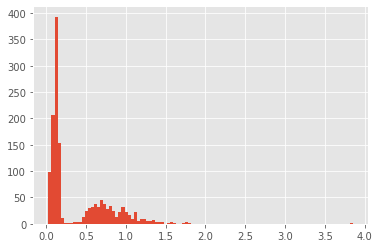

file_num:  21


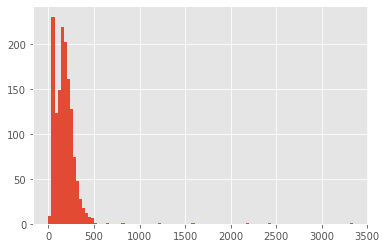

file_num:  22


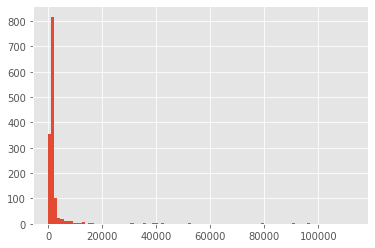

file_num:  23


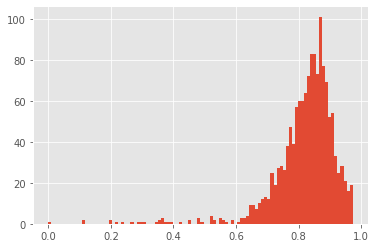

file_num:  24


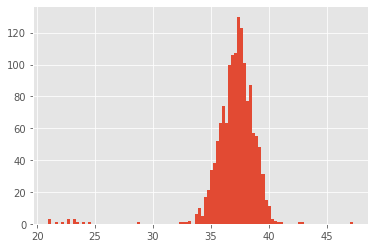

file_num:  25


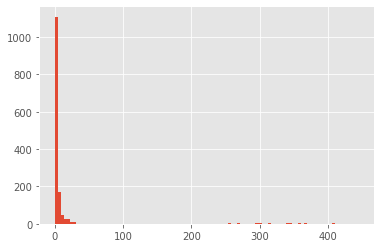

file_num:  26


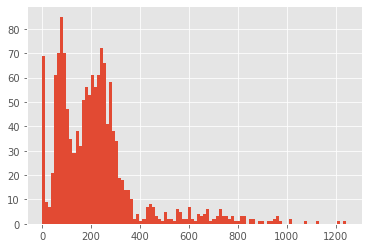

file_num:  27


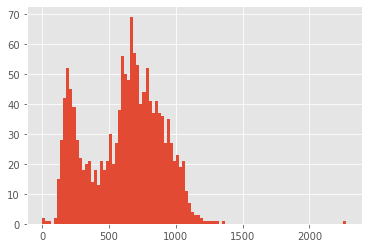

file_num:  28


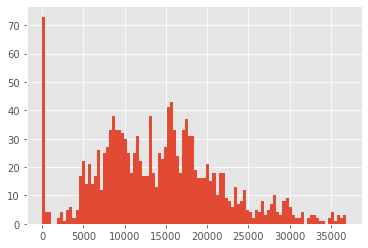

file_num:  29


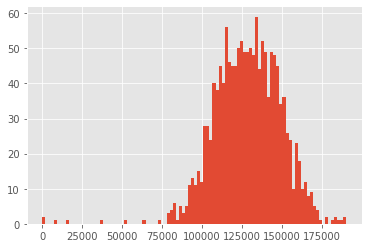

file_num:  30


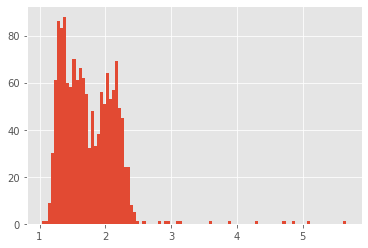

file_num:  31


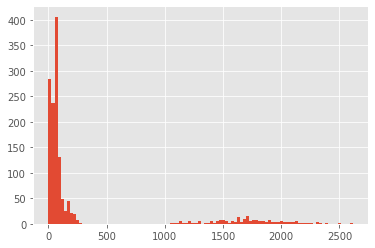

file_num:  32


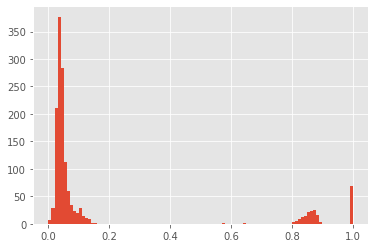

file_num:  33


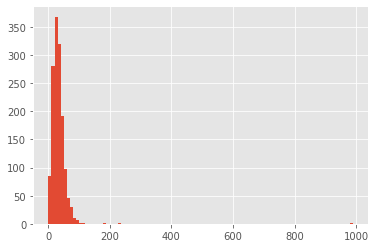

file_num:  34


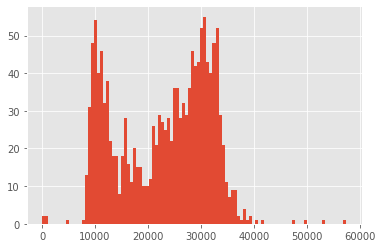

file_num:  35


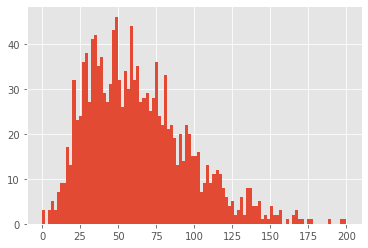

file_num:  36


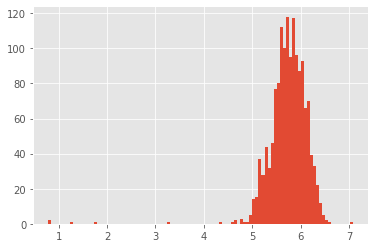

file_num:  37


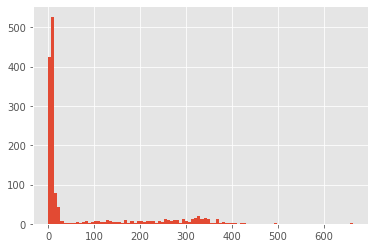

file_num:  38


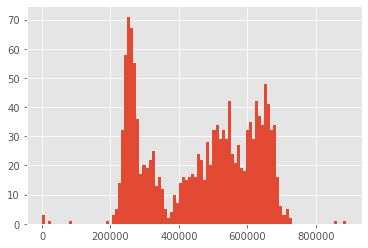

file_num:  39


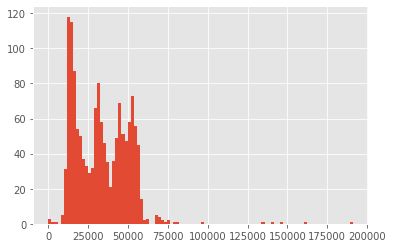

file_num:  40


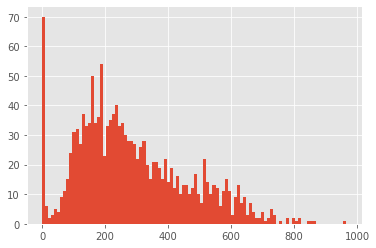

file_num:  41


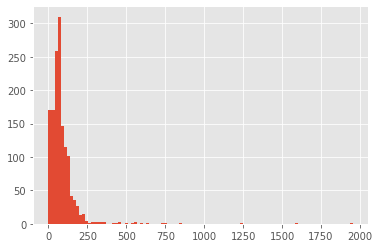

file_num:  42


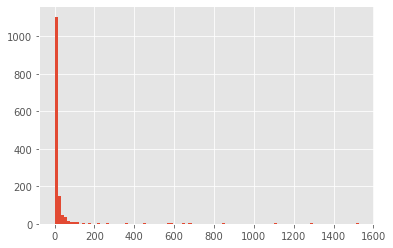

file_num:  43


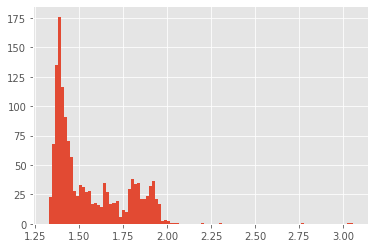

file_num:  44


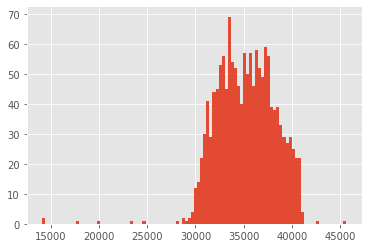

file_num:  45


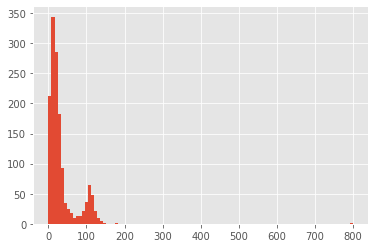

file_num:  46


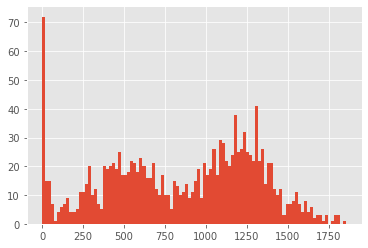

file_num:  47


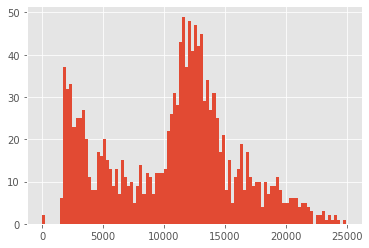

file_num:  48


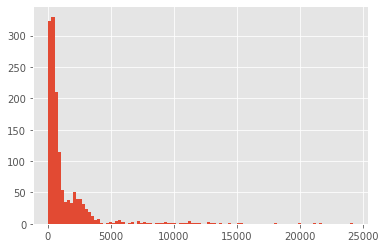

file_num:  49


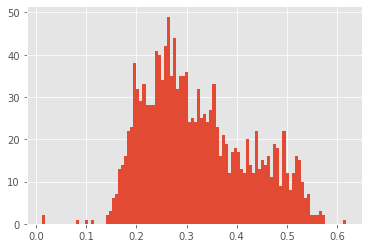

file_num:  50


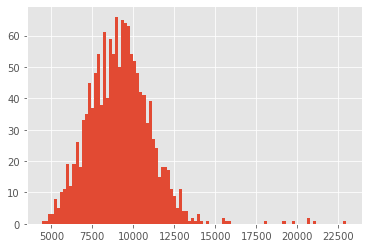

file_num:  51


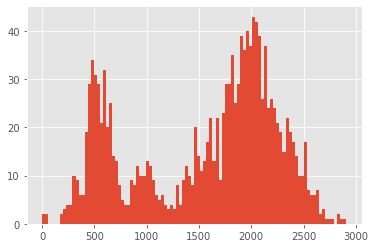

file_num:  52


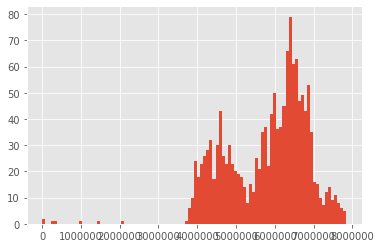

file_num:  53


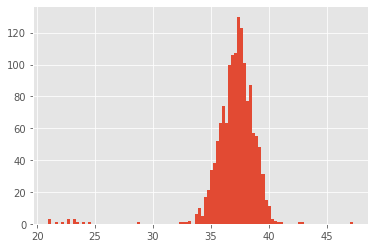

file_num:  54


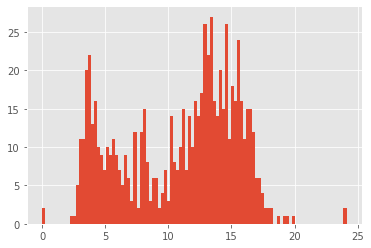

file_num:  55


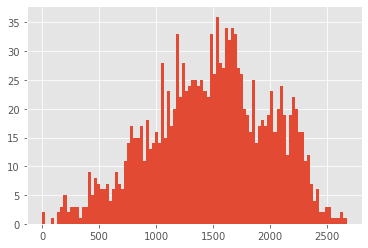

file_num:  56


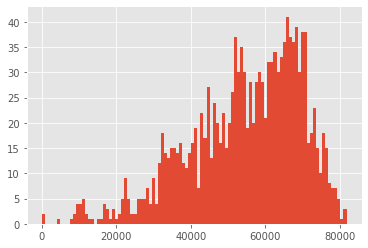

file_num:  57


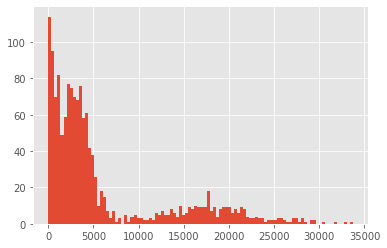

file_num:  58


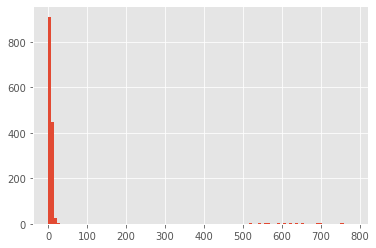

file_num:  59


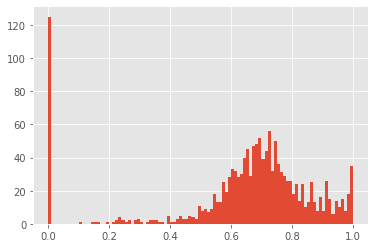

file_num:  60


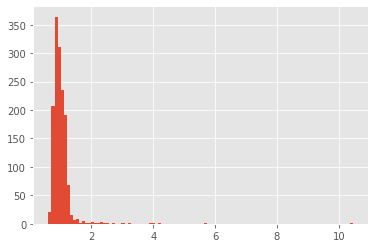

file_num:  61


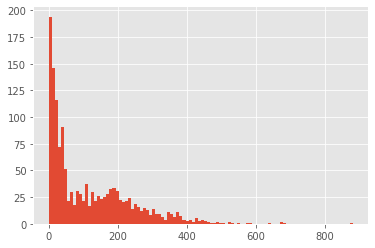

file_num:  62


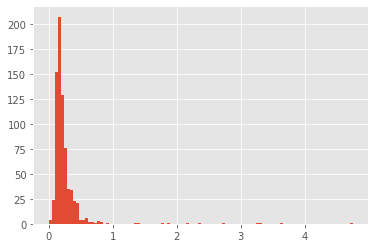

file_num:  63


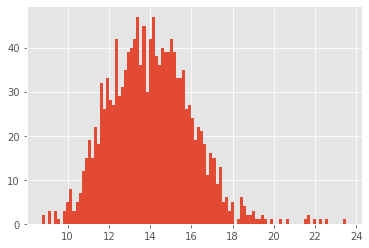

file_num:  64


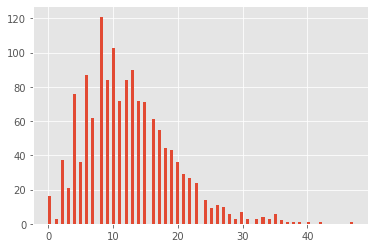

file_num:  65


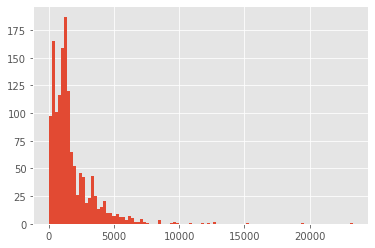

file_num:  66


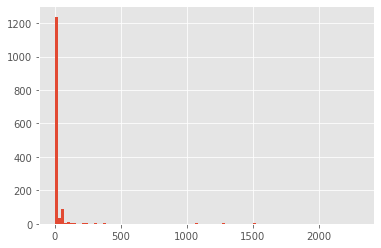

file_num:  67


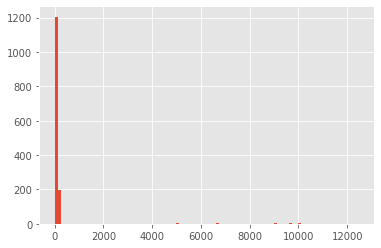

In [226]:
for i in range(1,67+1):
    plt.figure()
    file_num = i
    print('file_num: ', i)
    filename = "real_"+str(file_num)
    data=pd.read_csv("./dataset/A1Benchmark/"+filename+".csv")
    plt.hist(data.value, bins = 100)
    plt.show()

hours:  1


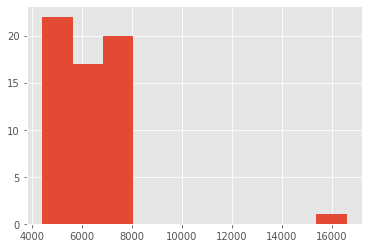

hours:  2


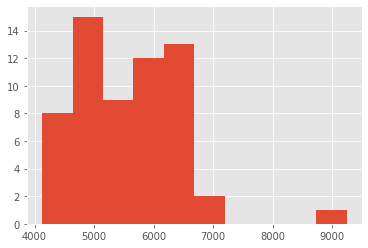

hours:  3


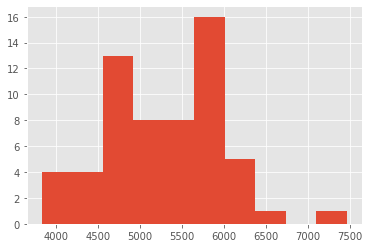

hours:  4


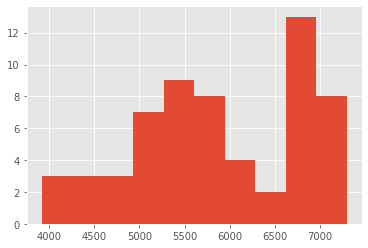

hours:  5


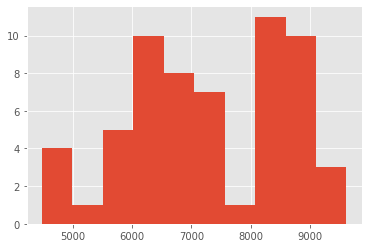

hours:  6


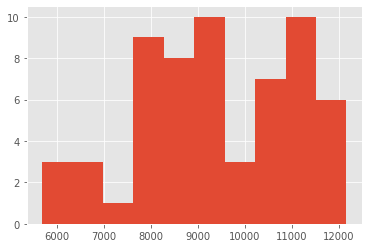

hours:  7


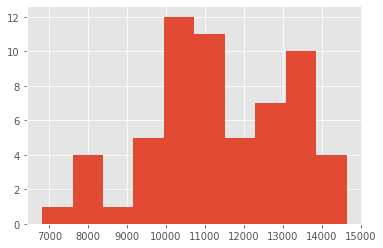

hours:  8


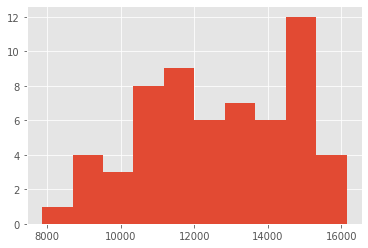

hours:  9


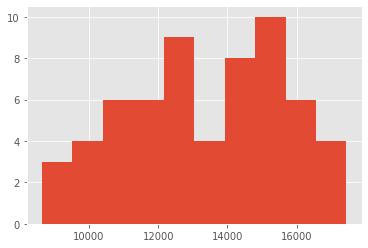

hours:  10


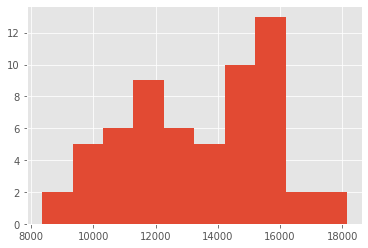

hours:  11


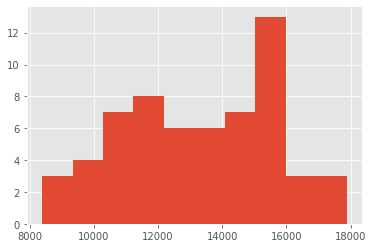

hours:  12


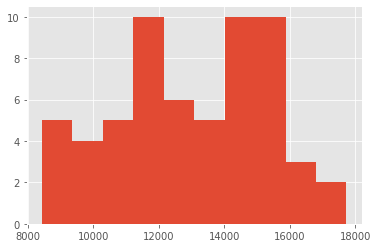

hours:  13


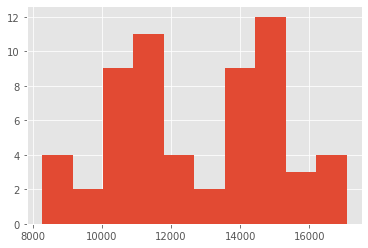

hours:  14


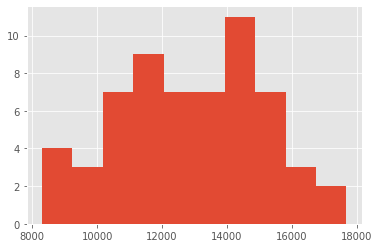

hours:  15


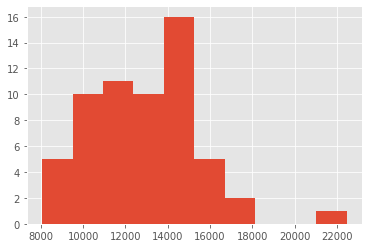

hours:  16


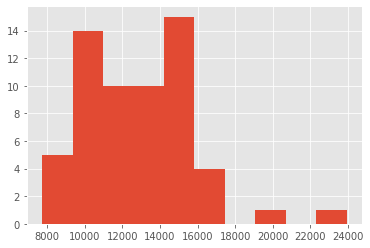

hours:  17


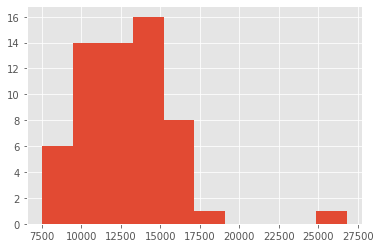

hours:  18


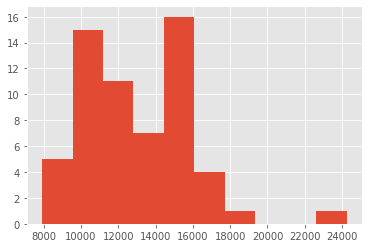

hours:  19


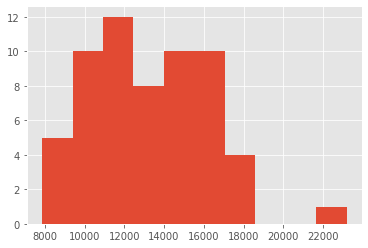

hours:  20


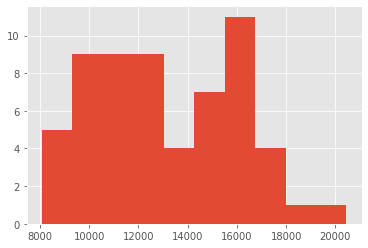

hours:  21


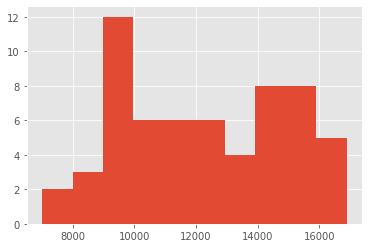

hours:  22


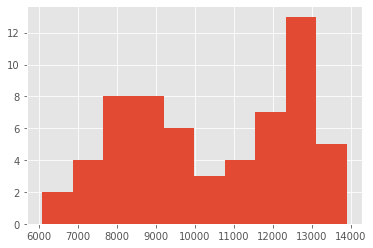

hours:  23


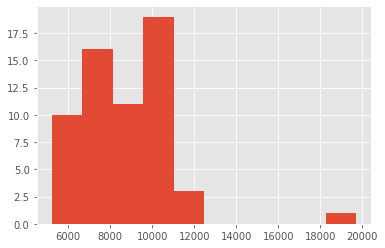

hours:  24


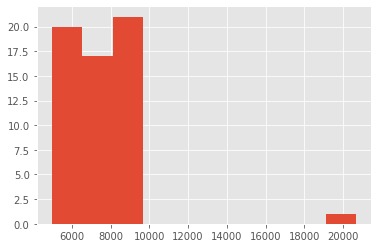

In [262]:
for i in range(1,25):
    print('hours: ', i)
    plt.hist(data[data.hours == i].value, bins = 10)
    plt.show()

#### Every timestamp is an hour slot.

In [274]:
total_hourly_cnt = pd.Series(index = range(1,25), data = 0)
for i in range(1,67+1):
    file_num = i
    filename = "real_"+str(file_num)
    data=pd.read_csv("./dataset/A1Benchmark/"+filename+".csv")
    data['hours'] = (list(np.arange(1,25)) * (len(data)//24 + 1))[:len(data)]
    data_hourly_cnt = data.groupby(['hours']).is_anomaly.sum()
    total_hourly_cnt += data_hourly_cnt

<BarContainer object of 24 artists>

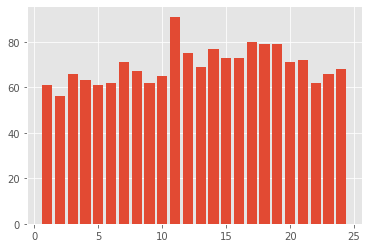

In [281]:
plt.bar(x = total_hourly_cnt.index, height=total_hourly_cnt.values)